# Decision Tree - Additional dataset

## Constants

In [ ]:
RANDOM_STATE = 42

# The size of matplotlib figures to draw the decision trees
FIGURE_SIZE = (36, 16)

LABEL_NAME = "diagnosis"

## Imports

In [2]:
from dataclasses import dataclass

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.axes import Axes

from sklearn.utils import Bunch
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

## Dataset Description

In [3]:
data: Bunch = fetch_openml(
    data_id=15,
    as_frame=True,
    parser="pandas"
    )

In [4]:
from IPython.display import display, Markdown

display(Markdown(data.DESCR))

**Author**: Dr. William H. Wolberg, University of Wisconsin  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)), [University of Wisconsin](http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html) - 1995  
**Please cite**: See below, plus [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

**Breast Cancer Wisconsin (Original) Data Set.** Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The target feature records the prognosis (malignant or benign). [Original data available here](ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/)  

Current dataset was adapted to ARFF format from the UCI version. Sample code ID's were removed.  

! Note that there is also a related Breast Cancer Wisconsin (Diagnosis) Data Set with a different set of features, better known as [wdbc](https://www.openml.org/d/1510).

### Relevant Papers  

W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993. 

O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.  

### Citation request  

This breast cancer database was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  If you publish results when using this database, then please include this information in your acknowledgments.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

Downloaded from openml.org.

In [5]:
features_df = pd.DataFrame(data.data)
label_series = pd.Series(data.target, name=LABEL_NAME)

In [6]:
features_df

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Clump_Thickness        699 non-null    int64  
 1   Cell_Size_Uniformity   699 non-null    int64  
 2   Cell_Shape_Uniformity  699 non-null    int64  
 3   Marginal_Adhesion      699 non-null    int64  
 4   Single_Epi_Cell_Size   699 non-null    int64  
 5   Bare_Nuclei            683 non-null    float64
 6   Bland_Chromatin        699 non-null    int64  
 7   Normal_Nucleoli        699 non-null    int64  
 8   Mitoses                699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [8]:
feature_names = features_df.columns.tolist()

feature_names

['Clump_Thickness',
 'Cell_Size_Uniformity',
 'Cell_Shape_Uniformity',
 'Marginal_Adhesion',
 'Single_Epi_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [9]:
label_series

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: diagnosis, Length: 699, dtype: category
Categories (2, object): ['benign', 'malignant']

In [10]:
label_names: list[str] = label_series.astype(str).unique().tolist()

label_names

['benign', 'malignant']

### Citation

Wolberg, WIlliam. "Breast Cancer Wisconsin (Original)." UCI Machine Learning Repository, 1990, https://doi.org/10.24432/C5HP4Z.

## Preparing the datasets

### Encoding categorical features

In [11]:
df_with_encoded_features = pd.get_dummies(features_df, drop_first=True)

df_with_encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Clump_Thickness        699 non-null    int64  
 1   Cell_Size_Uniformity   699 non-null    int64  
 2   Cell_Shape_Uniformity  699 non-null    int64  
 3   Marginal_Adhesion      699 non-null    int64  
 4   Single_Epi_Cell_Size   699 non-null    int64  
 5   Bare_Nuclei            683 non-null    float64
 6   Bland_Chromatin        699 non-null    int64  
 7   Normal_Nucleoli        699 non-null    int64  
 8   Mitoses                699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


### Train-test split

In [12]:
combined_df = df_with_encoded_features.join(label_series)

In [13]:
@dataclass
class DataSplit:
    feature_train: pd.DataFrame
    label_train: pd.Series
    feature_test: pd.DataFrame
    label_test: pd.Series

In [14]:
def split_data(
        df: pd.DataFrame,
        train_proportion = 0.8,
        random_state = 42,
        ):
    """
    Creates stratified train/test splits with shuffling.
    Returns feature_train, label_train, feature_test, label_test subsets.
    """
    train_df: pd.DataFrame
    test_df: pd.DataFrame
    train_df, test_df = train_test_split(
        df,
        train_size=train_proportion,
        random_state=random_state,
        stratify=df[LABEL_NAME] if LABEL_NAME in df.columns else None,
        )
    return DataSplit(
        feature_train=train_df.drop(columns=[LABEL_NAME]),
        label_train=train_df[LABEL_NAME],
        feature_test=test_df.drop(columns=[LABEL_NAME]),
        label_test=test_df[LABEL_NAME],
    )

### Visualizing the class distribution (in the dataset)

In [15]:
def plot_class_distribution(
        y_original: pd.Series,
        y_train: pd.Series,
        y_test: pd.Series,
        train_proportion: float = 0.8,
        ):
    """
    Visualizes class distributions across original, train, and test sets
    to demonstrate appropriate stratified splitting.
    """
    axes: list[Axes]
    figure, axes = plt.subplots(1, 3, figsize=(9, 5))
    sns.countplot(x=y_original, hue=y_original, ax=axes[0], legend=False)
    sns.countplot(x=y_train, hue=y_train, ax=axes[1], legend=False)
    sns.countplot(x=y_test, hue=y_test, ax=axes[2], legend=False)
    axes[0].set_title("Original Dataset")
    axes[1].set_title("Train Set")
    axes[2].set_title("Test Set")
    figure.suptitle(
        "Class Distribution in The Original, Train and Test Sets\n"
        f"(With {train_proportion*100:.0f}% Train Proportion)")
    figure.tight_layout()
    plt.show()

## Building the decision tree classifier (with resulting tree visualization)

In [16]:
def build_classifier(
        feature_train: pd.DataFrame,
        label_train: pd.Series,
        random_state: int = RANDOM_STATE,
        ):
    """
    Builds DecisionTreeClassifier using information gain (entropy criterion)
    and fits it to the training set.
    """
    classifier = DecisionTreeClassifier(
        criterion="entropy",
        random_state=random_state
        )
    classifier.fit(feature_train, label_train)
    return classifier

In [17]:
def plot_decision_tree(
        classifier: DecisionTreeClassifier,
        feature_names: list[str],
        label_names: list[str],
        ):
    """
    Visualizes the decision tree structure using Graphviz-style plotting.
    """
    plt.figure(figsize=FIGURE_SIZE)
    plot_tree(
        classifier,
        feature_names=feature_names,
        class_names=label_names,
        filled=True,
        rounded=True,
        fontsize=10,
    )
    plt.title("Decision Tree Visualization")
    plt.show()

## Evaluating the decision tree classifier

In [18]:
def print_classification_report(
        y_true: pd.Series,
        y_pred: pd.Series,
        label_names: list[str],
    ):
    """
    Generates classification report with precision, recall, f1-score.
    """
    print(classification_report(
        y_true, y_pred,
        labels=label_names,
        zero_division=0,
        ))

In [19]:
def plot_confusion_matrix(
        y_true: pd.Series,
        y_pred: pd.Series,
        label_names: list[str],
        ):
    """
    Generates confusion matrix visualization for evaluating predictions.
    """
    cm = confusion_matrix(y_true, y_pred, labels=label_names)
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=label_names, yticklabels=label_names
        )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

## Visualizations

### **40/60** train-test split

In [20]:
TRAIN_PROPORTION = 0.4

In [21]:
forty_split = split_data(
    combined_df,
    train_proportion=TRAIN_PROPORTION,
    random_state=RANDOM_STATE,
)

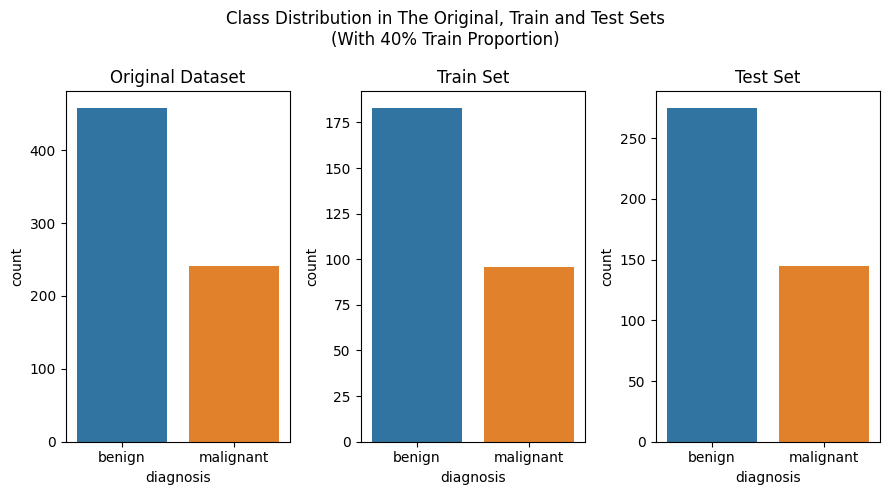

In [22]:
plot_class_distribution(
    label_series,
    forty_split.label_train,
    forty_split.label_test,
    train_proportion=TRAIN_PROPORTION,
)

In [23]:
classifier_40 = build_classifier(
    forty_split.feature_train,
    forty_split.label_train,
    random_state=RANDOM_STATE,
)

predictions_40 = pd.Series(
    classifier_40.predict(forty_split.feature_test), name=LABEL_NAME
)

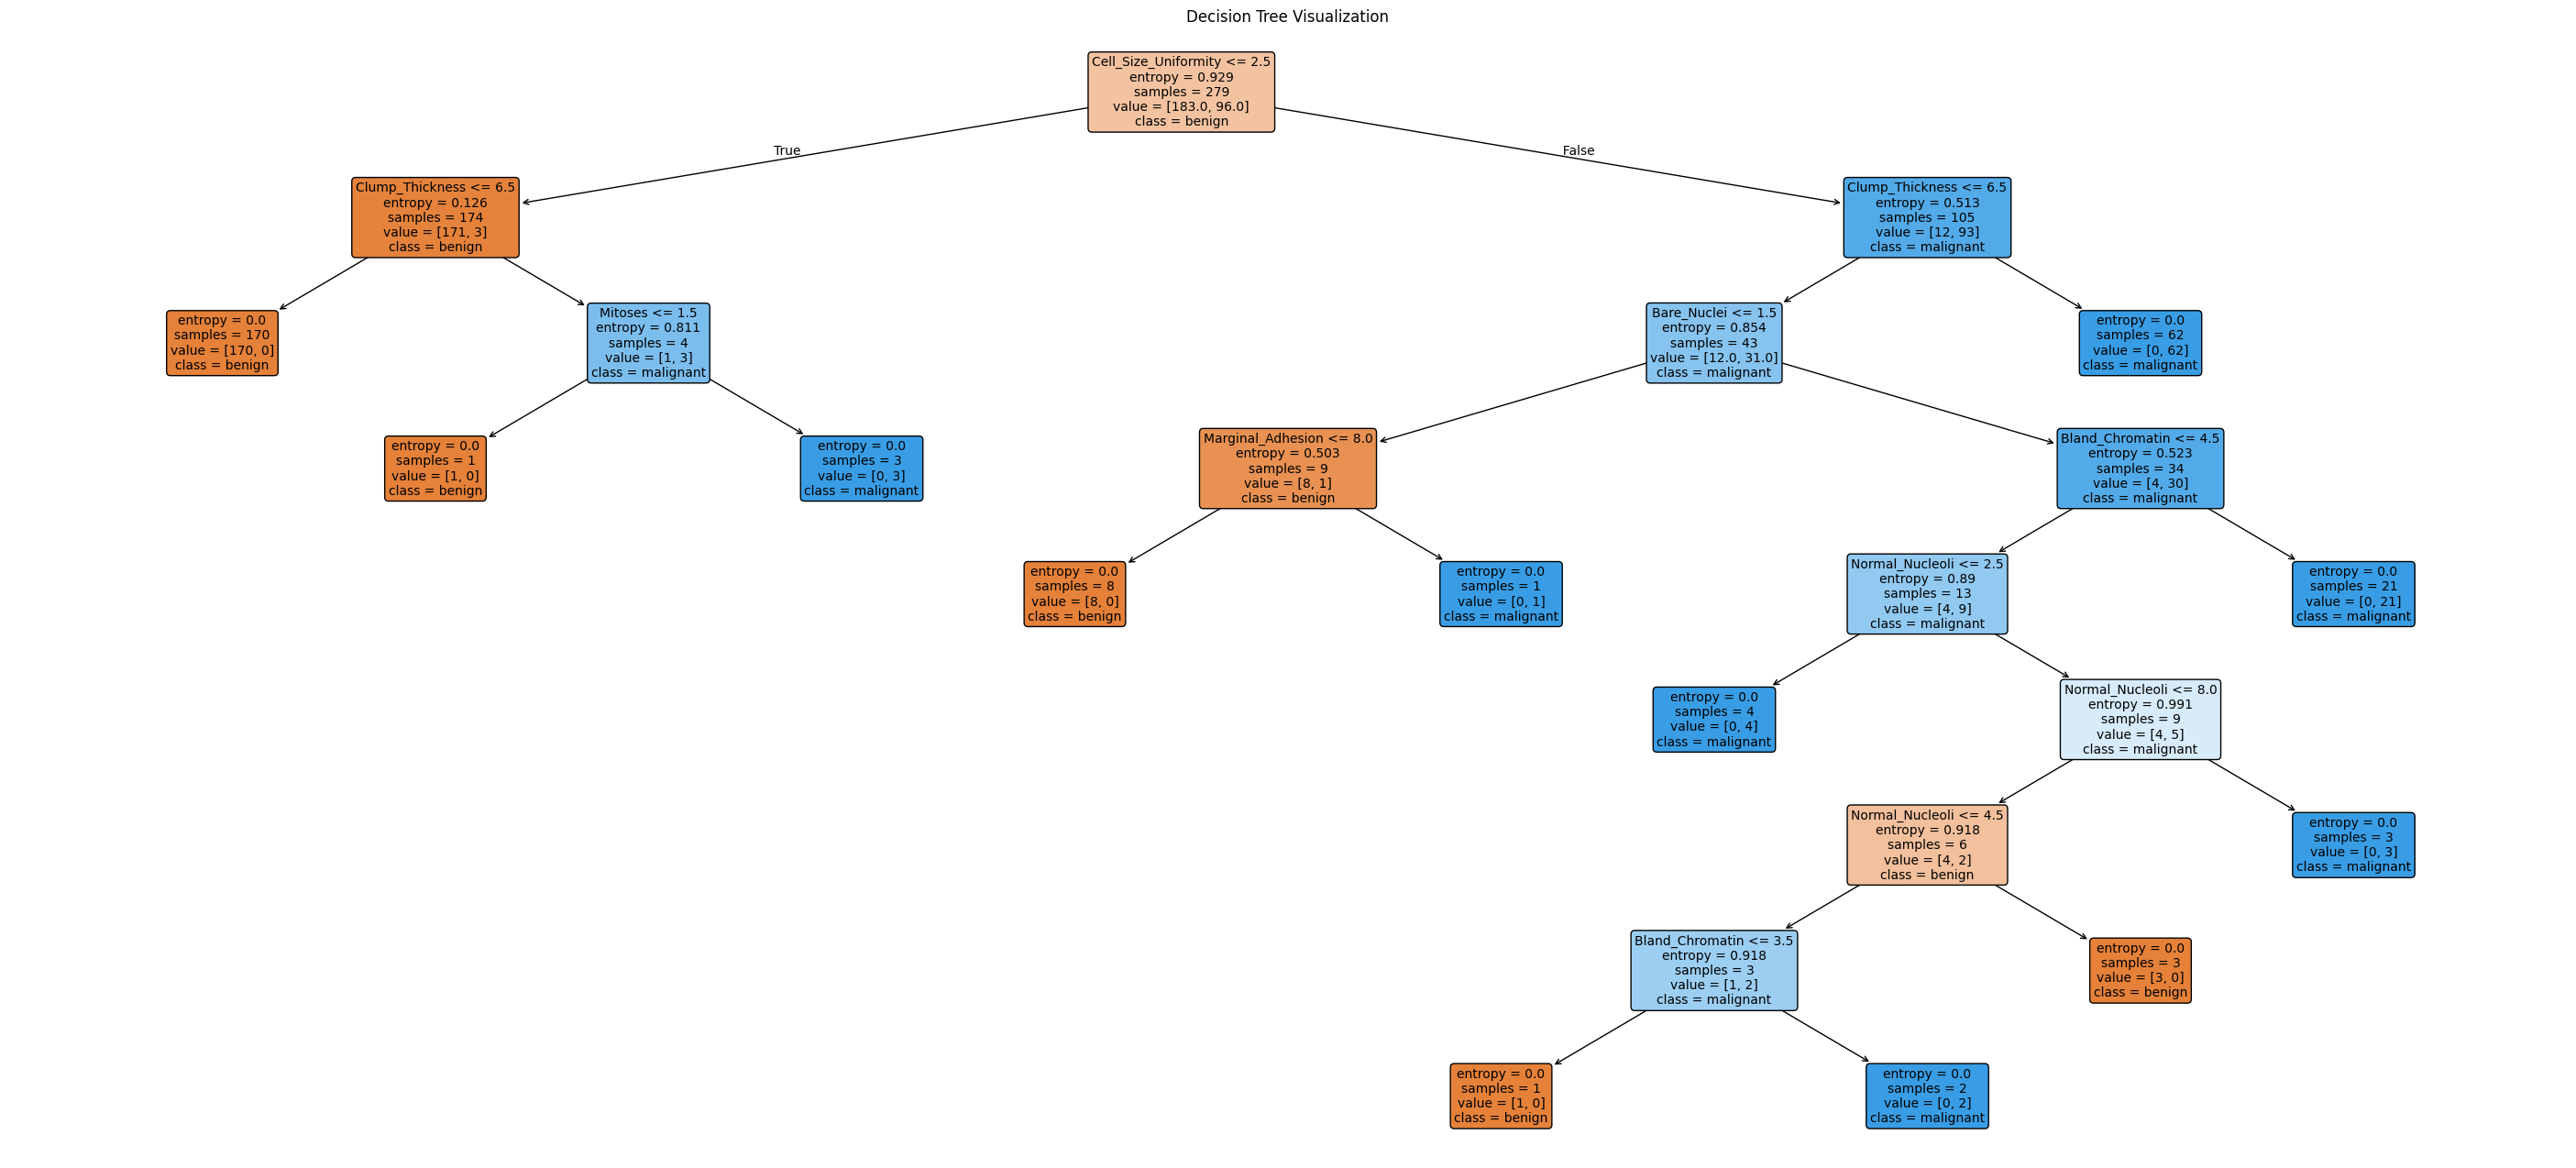

In [24]:
plot_decision_tree(
    classifier_40,
    feature_names=feature_names,
    label_names=label_names,
)

In [25]:
print_classification_report(
    forty_split.label_test,
    predictions_40,
    label_names=label_names,
)

              precision    recall  f1-score   support

      benign       0.93      0.95      0.94       275
   malignant       0.91      0.86      0.88       145

    accuracy                           0.92       420
   macro avg       0.92      0.90      0.91       420
weighted avg       0.92      0.92      0.92       420



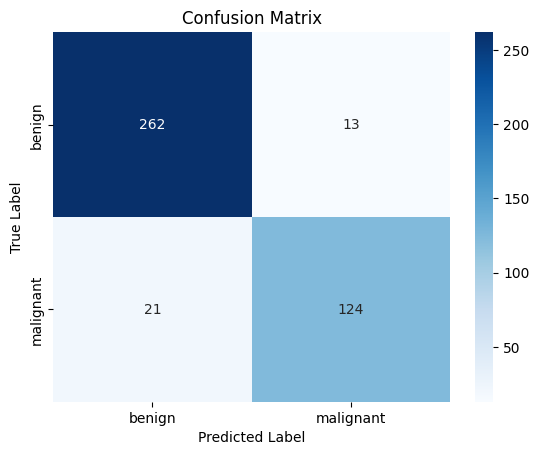

In [26]:
plot_confusion_matrix(
    forty_split.label_test,
    predictions_40,
    label_names=label_names,
)

### **60/40** train-test split

In [27]:
TRAIN_PROPORTION = 0.6

In [28]:
sixty_split = split_data(
    combined_df,
    train_proportion=TRAIN_PROPORTION,
    random_state=RANDOM_STATE,
)

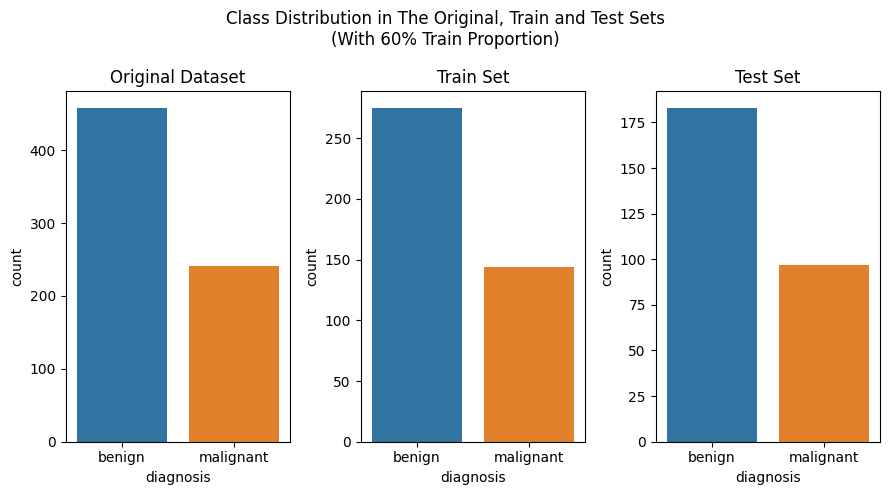

In [29]:
plot_class_distribution(
    label_series,
    sixty_split.label_train,
    sixty_split.label_test,
    train_proportion=TRAIN_PROPORTION,
)

In [30]:
classifier_60 = build_classifier(
    sixty_split.feature_train,
    sixty_split.label_train,
    random_state=RANDOM_STATE,
)

predictions_60 = pd.Series(
    classifier_60.predict(sixty_split.feature_test), name=LABEL_NAME
)

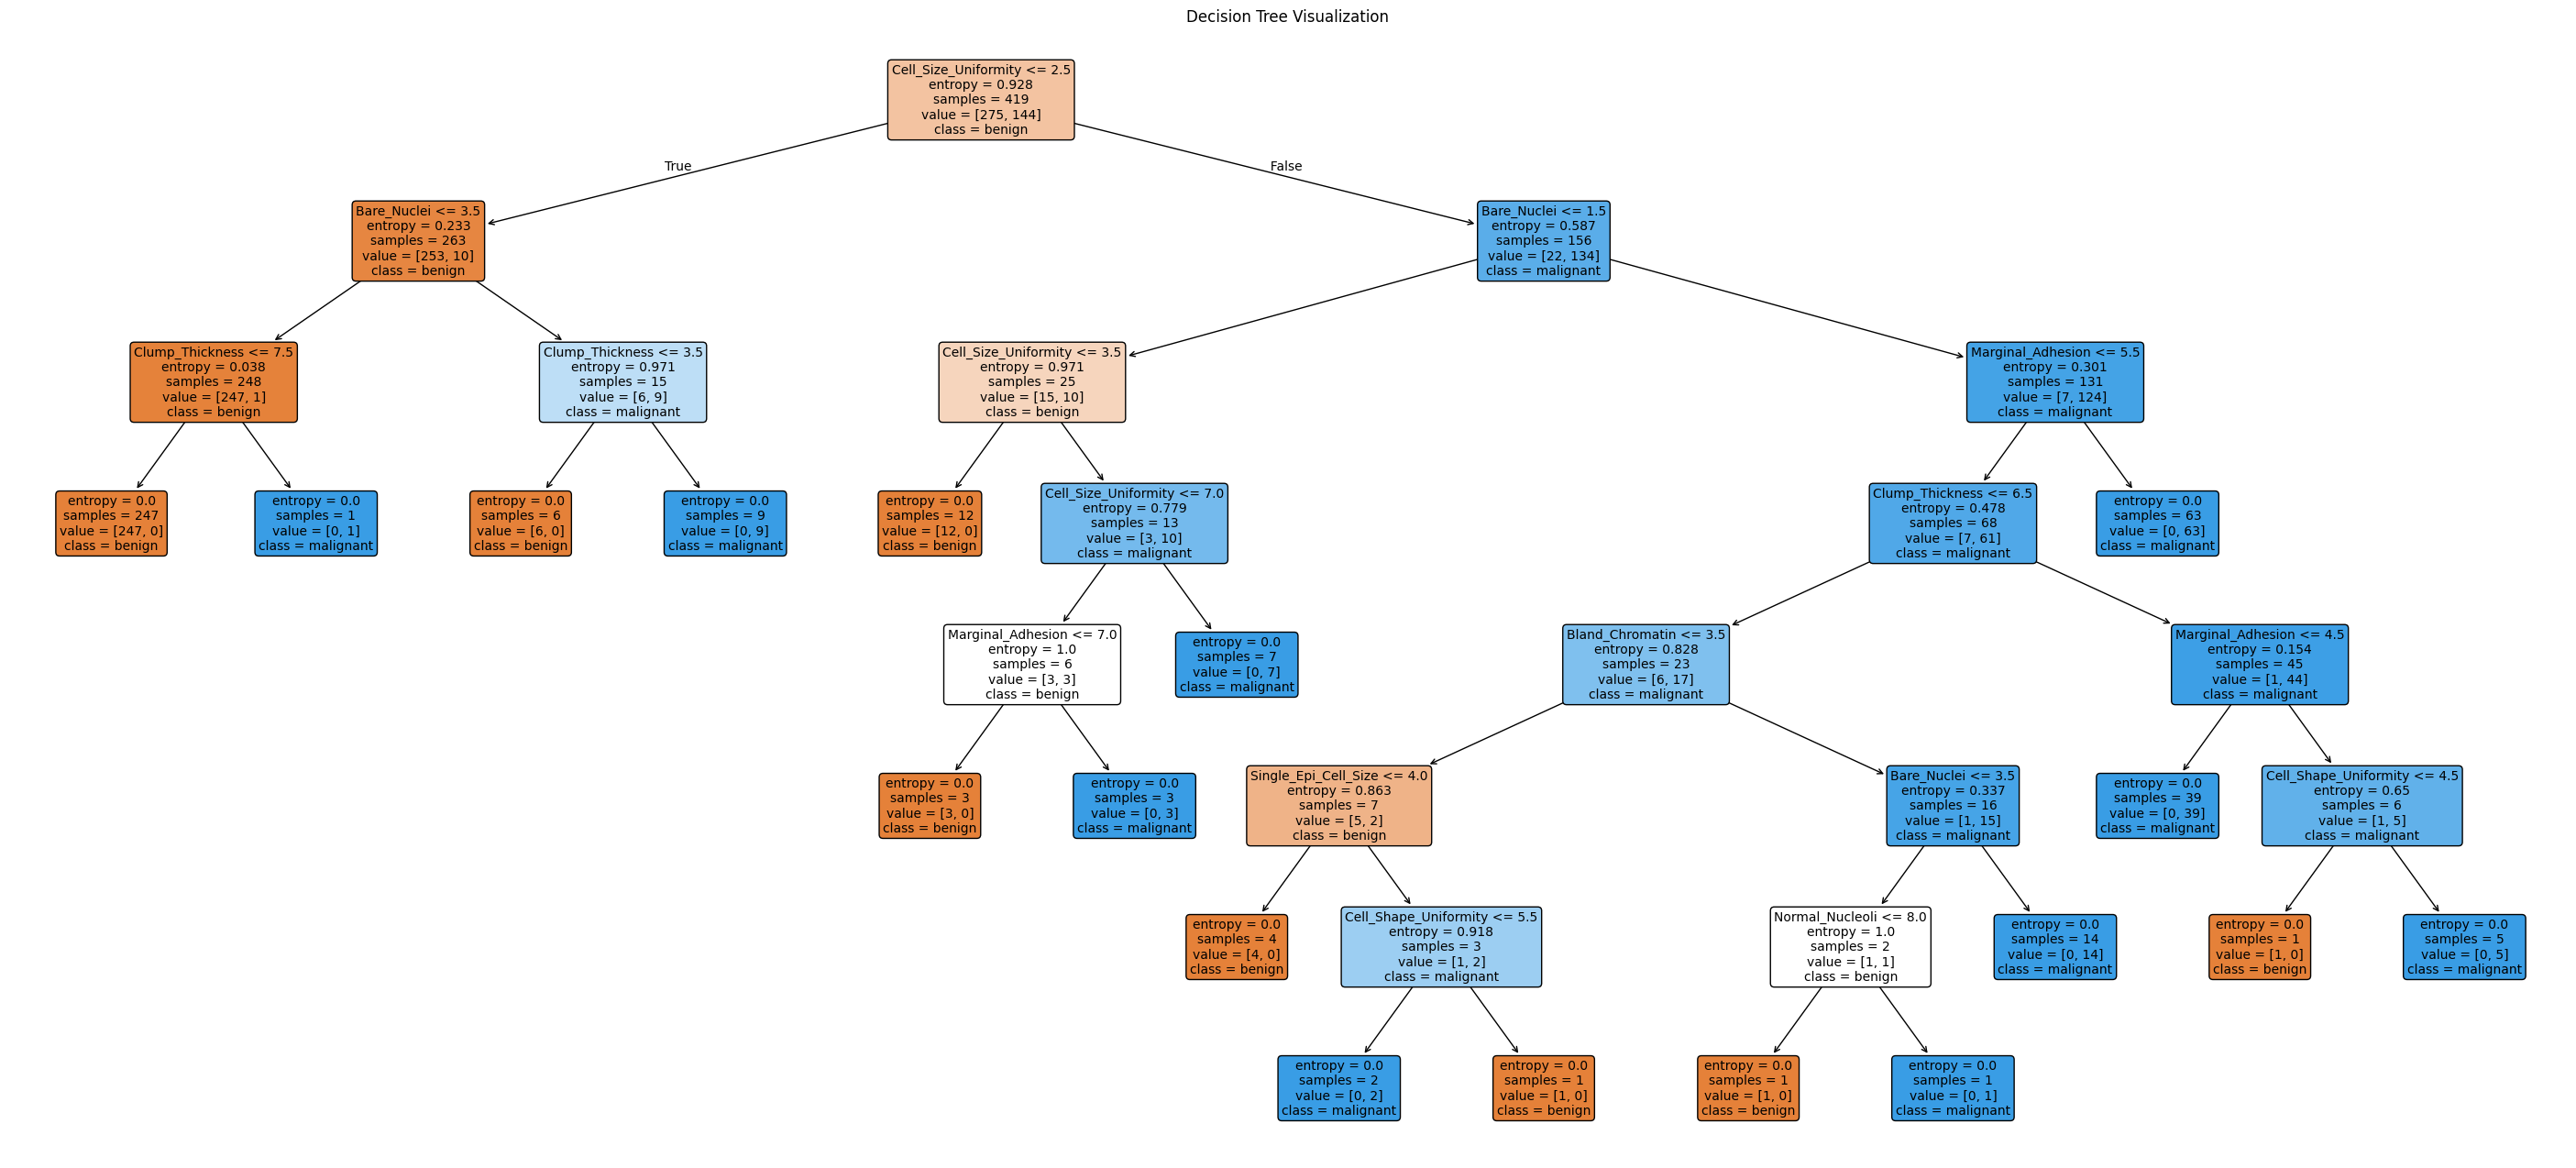

In [31]:
plot_decision_tree(
    classifier_60,
    feature_names=feature_names,
    label_names=label_names,
)

In [32]:
print_classification_report(
    sixty_split.label_test,
    predictions_60,
    label_names=label_names,
)

              precision    recall  f1-score   support

      benign       0.95      0.95      0.95       183
   malignant       0.90      0.90      0.90        97

    accuracy                           0.93       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.93      0.93      0.93       280



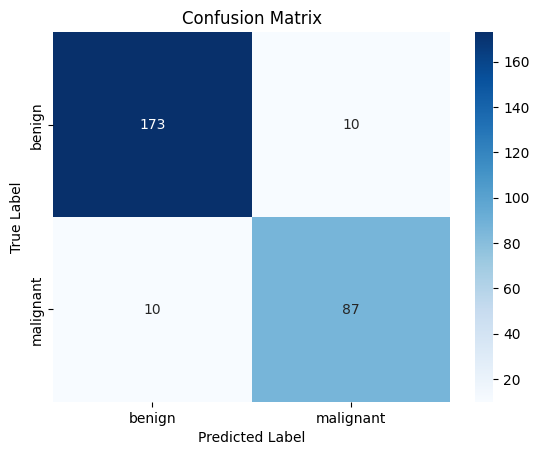

In [33]:
plot_confusion_matrix(
    sixty_split.label_test,
    predictions_60,
    label_names=label_names,
)

### **80/20** train-test split

In [34]:
TRAIN_PROPORTION = 0.8

In [35]:
eighty_split = split_data(
    combined_df,
    train_proportion=TRAIN_PROPORTION,
    random_state=RANDOM_STATE,
)

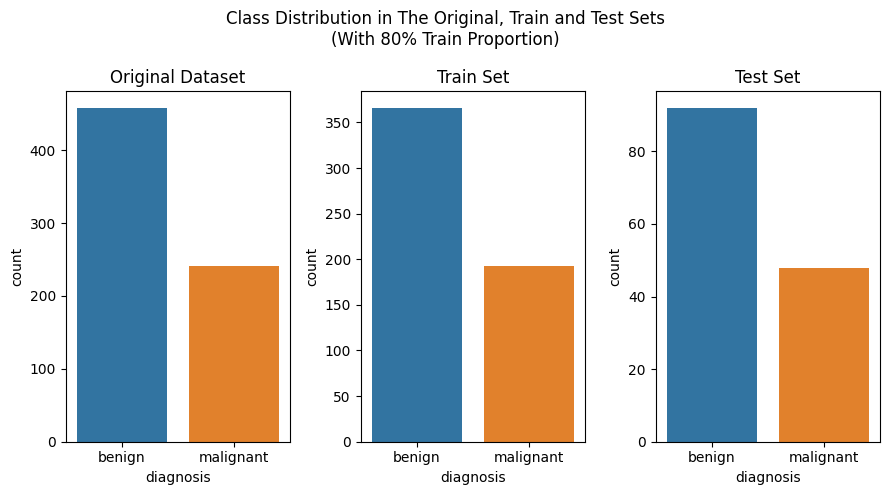

In [36]:
plot_class_distribution(
    label_series,
    eighty_split.label_train,
    eighty_split.label_test,
    train_proportion=TRAIN_PROPORTION,
)

In [37]:
classifier_80 = build_classifier(
    eighty_split.feature_train,
    eighty_split.label_train,
    random_state=RANDOM_STATE,
)

predictions_80 = pd.Series(
    classifier_80.predict(eighty_split.feature_test), name=LABEL_NAME
)

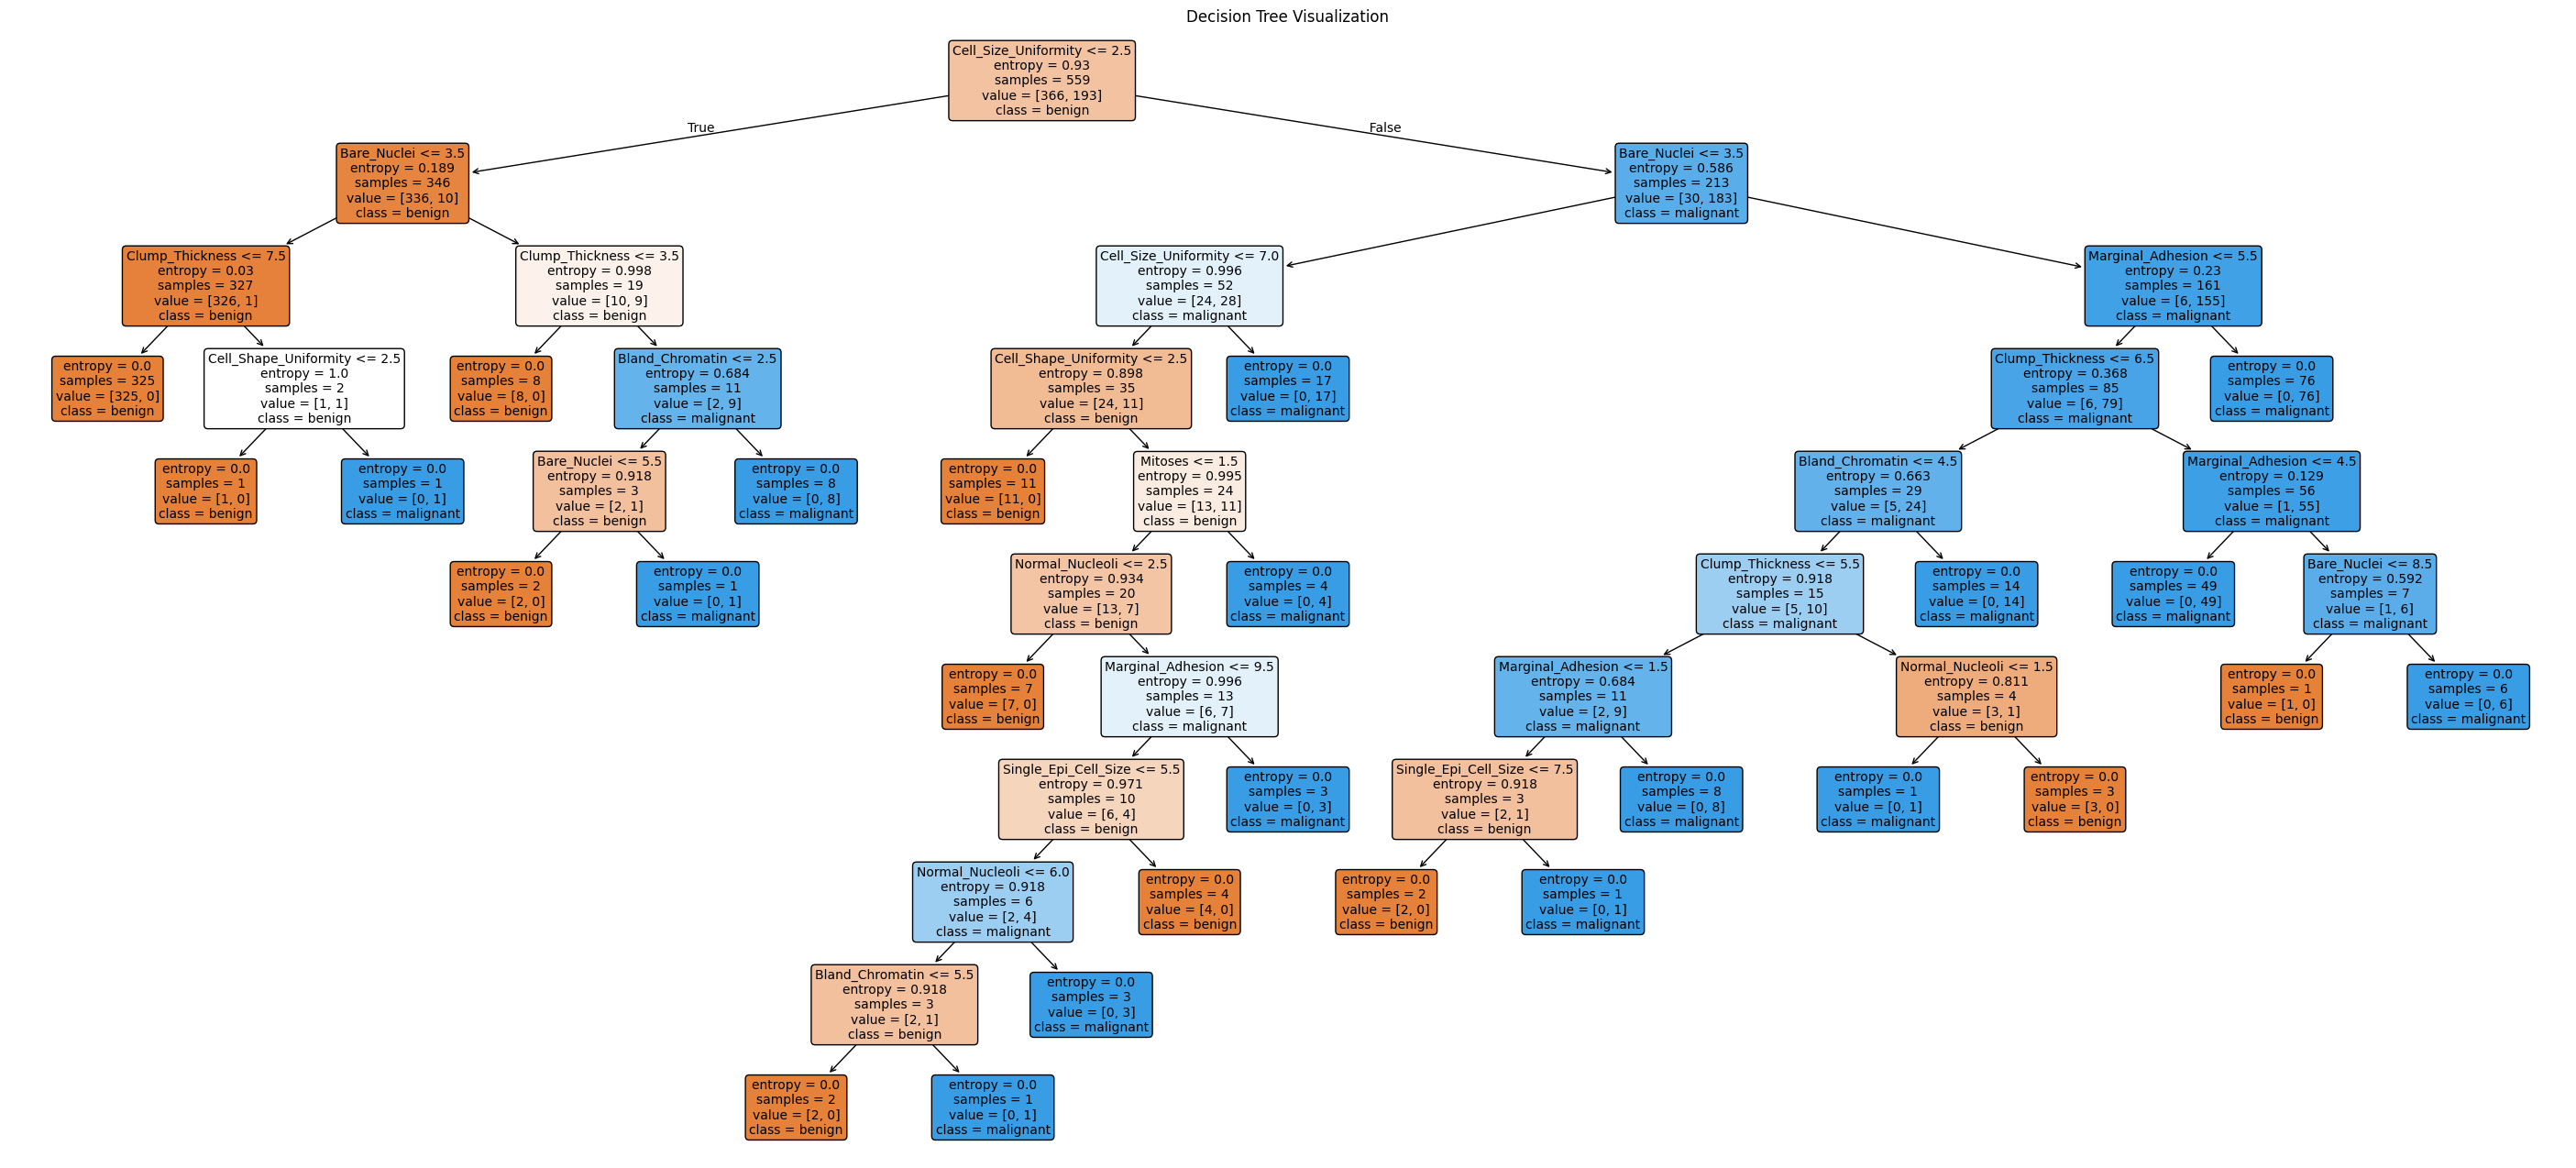

In [38]:
plot_decision_tree(
    classifier_80,
    feature_names=feature_names,
    label_names=label_names,
)

In [39]:
print_classification_report(
    eighty_split.label_test,
    predictions_80,
    label_names=label_names,
)

              precision    recall  f1-score   support

      benign       0.92      0.97      0.94        92
   malignant       0.93      0.83      0.88        48

    accuracy                           0.92       140
   macro avg       0.92      0.90      0.91       140
weighted avg       0.92      0.92      0.92       140



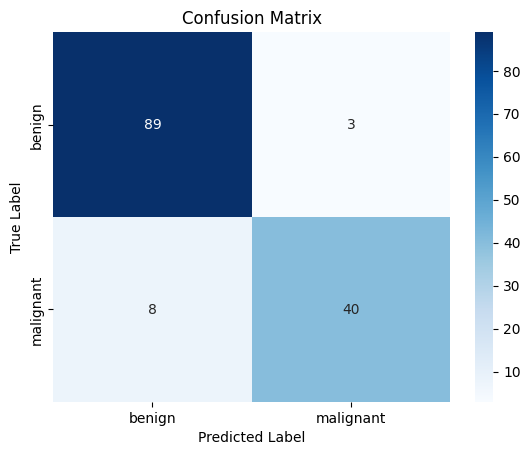

In [40]:
plot_confusion_matrix(
    eighty_split.label_test,
    predictions_80,
    label_names=label_names,
)

### **90/10** train-test split

In [41]:
TRAIN_PROPORTION = 0.9

In [42]:
ninety_split = split_data(
    combined_df,
    train_proportion=TRAIN_PROPORTION,
    random_state=RANDOM_STATE,
)

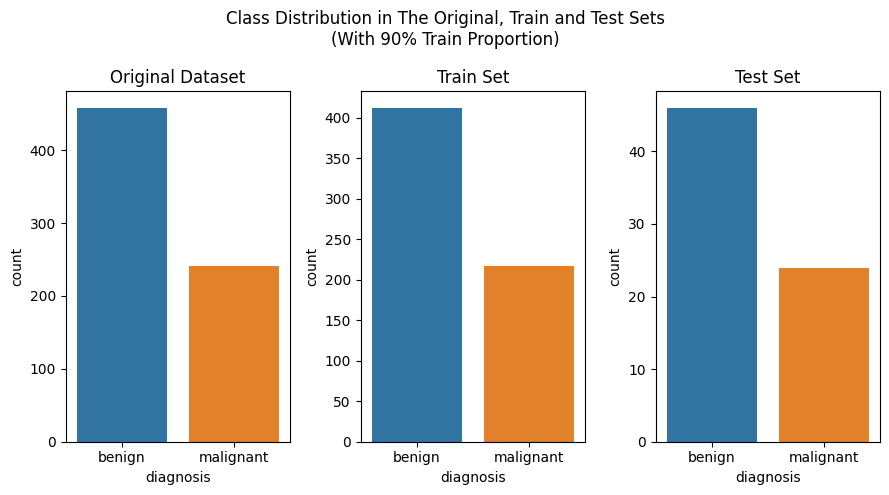

In [43]:
plot_class_distribution(
    label_series,
    ninety_split.label_train,
    ninety_split.label_test,
    train_proportion=TRAIN_PROPORTION,
)

In [44]:
classifier_90 = build_classifier(
    ninety_split.feature_train,
    ninety_split.label_train,
    random_state=RANDOM_STATE,
)

predictions_90 = pd.Series(
    classifier_90.predict(ninety_split.feature_test), name=LABEL_NAME
)

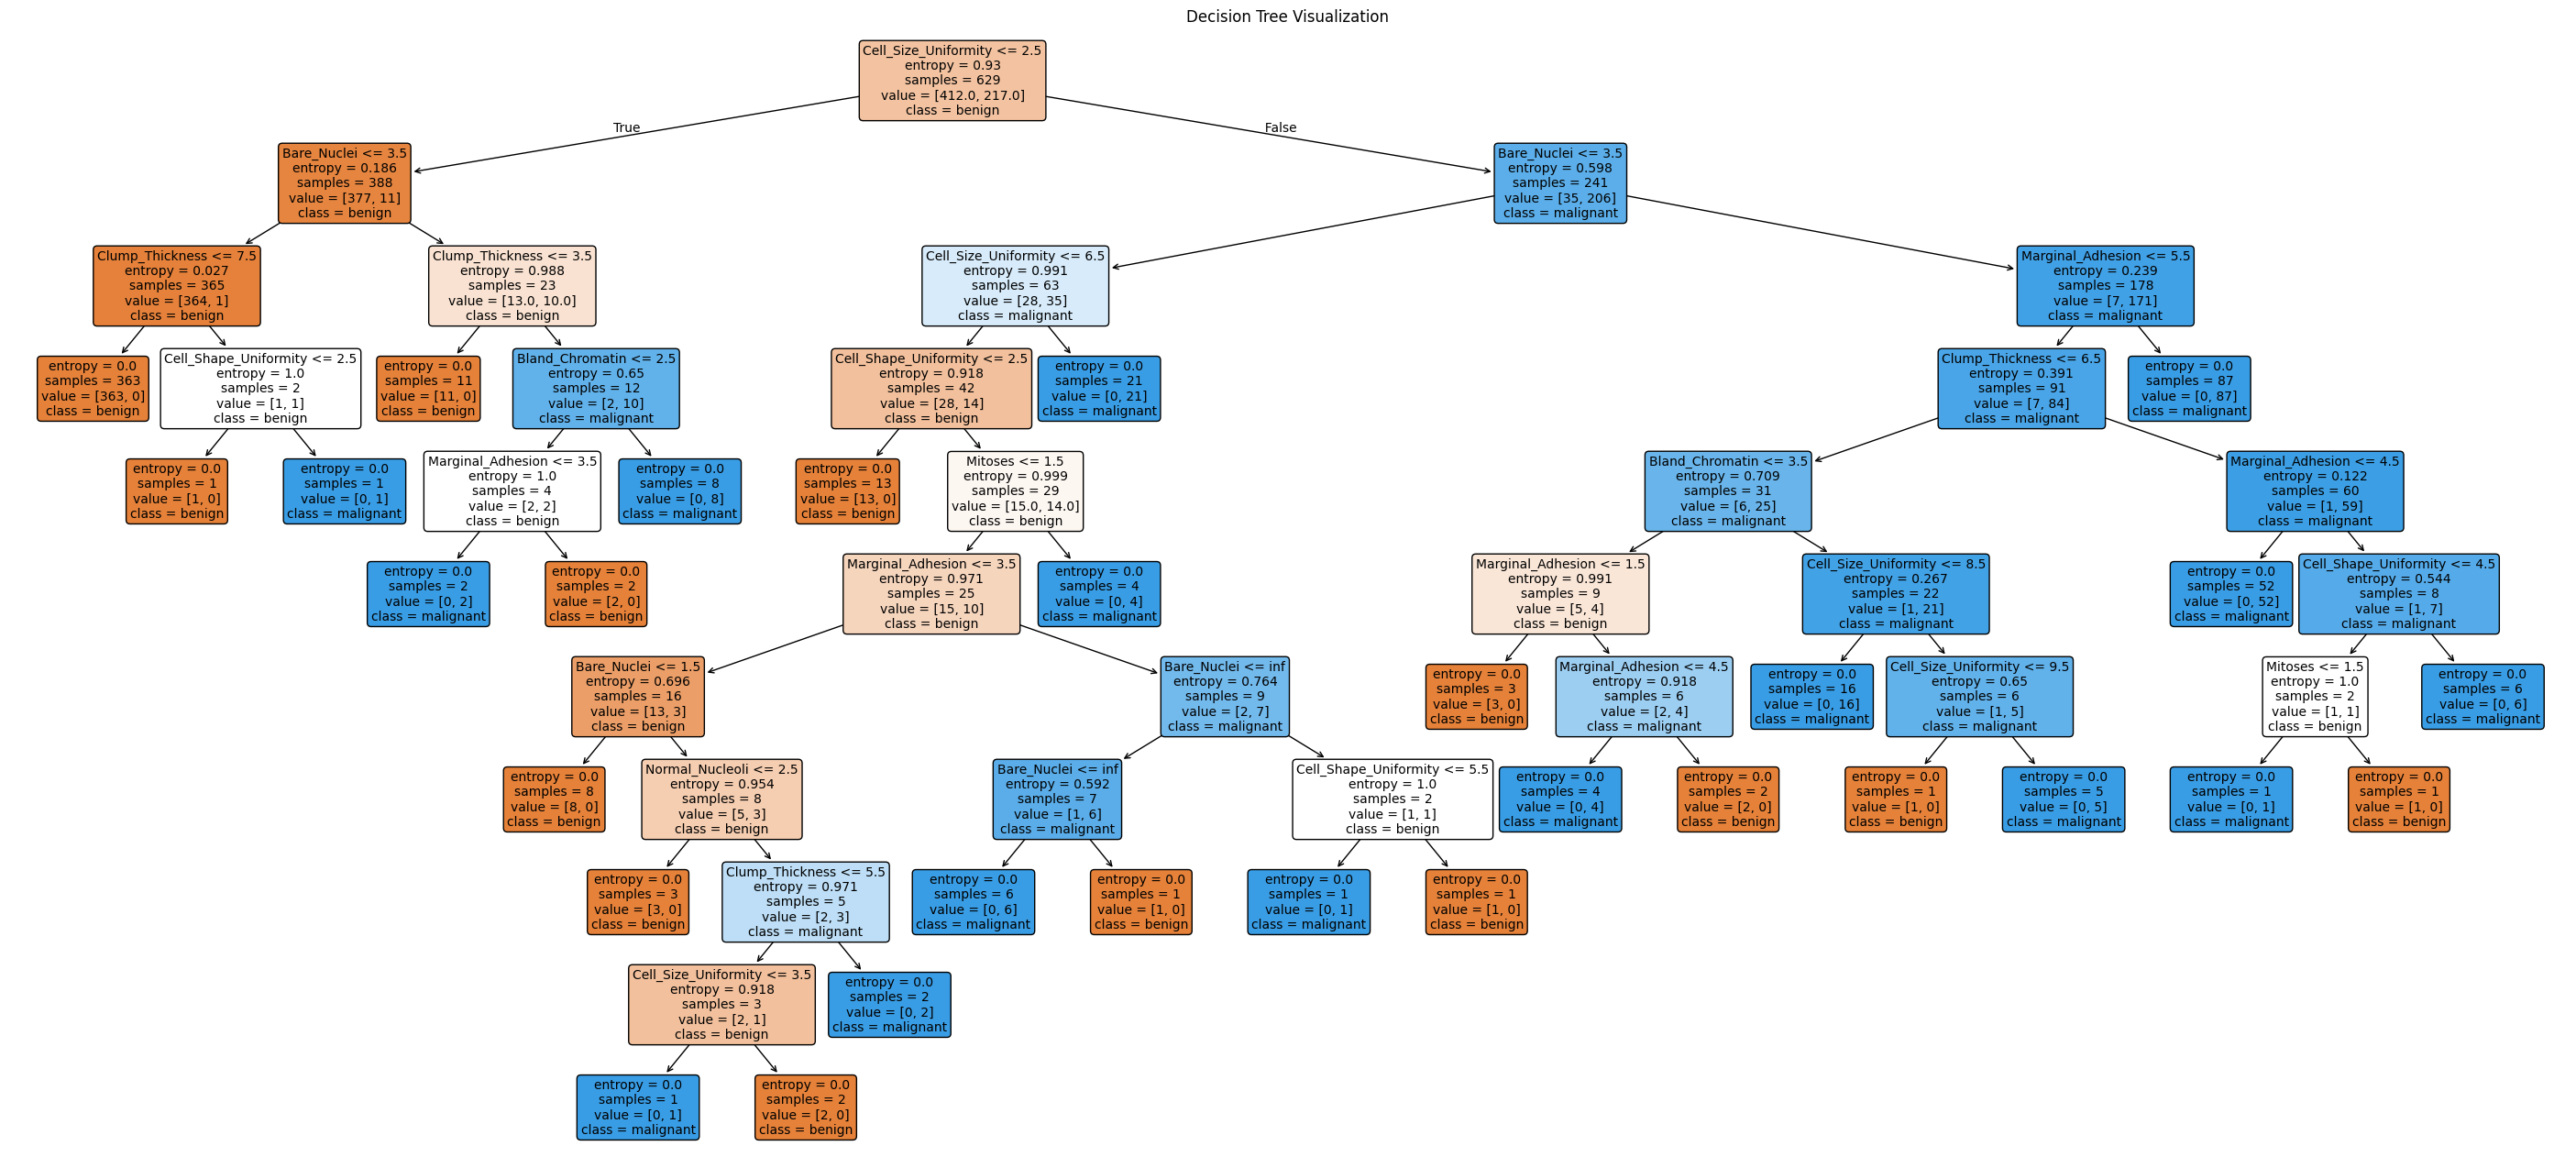

In [45]:
plot_decision_tree(
    classifier_90,
    feature_names=feature_names,
    label_names=label_names,
)

In [46]:
print_classification_report(
    ninety_split.label_test,
    predictions_90,
    label_names=label_names,
)

              precision    recall  f1-score   support

      benign       0.96      0.96      0.96        46
   malignant       0.92      0.92      0.92        24

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70



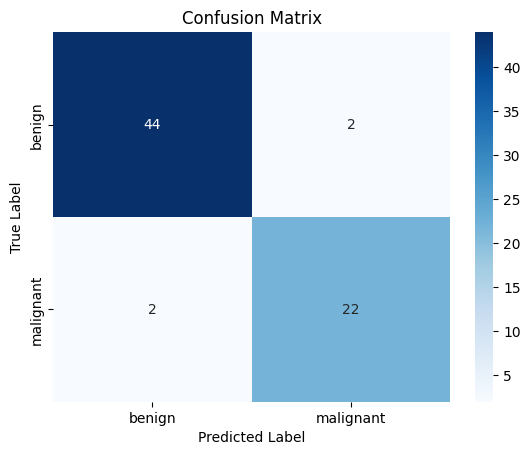

In [47]:
plot_confusion_matrix(
    ninety_split.label_test,
    predictions_90,
    label_names=label_names,
)